In [11]:
import pandas as pd
df = pd.read_excel("data/benjamin chidubem nwandu_8066508017_20251014161656.xlsx")

In [8]:
df.shape

(162, 10)

In [12]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# 2️⃣ Load Dataset
file_path = "data/benjamin chidubem nwandu_8066508017_20251014161656.xlsx"
df_raw = pd.read_excel(file_path, skiprows=2)

# 3️⃣ Inspect First Rows
df_raw.head(10)


,Trans. Date,Value Date,Description,Debit/Credit(₦),Balance(₦),Channel,Transaction Reference,Counterparty,Unnamed: 8,Unnamed: 9
0,2025 Aug 15 12:46:33,15 Aug 2025,Transfer from benjamin chidubem nwandu,"+50,000.00","50,000.00",E-Channel,APT00002250815134633144139554008,MONIE POINT | 5691116161,NaN,NaN
1,2025 Aug 15 12:46:35,15 Aug 2025,Electronic Money Transfer Levy,-50.00,"49,950.00",E-Channel,250815550100462871659545,NaN,NaN,NaN
2,2025 Aug 15 13:39:50,15 Aug 2025,Airtime,-490.00,"49,460.00",E-Channel,250815100100464018924430,NaN,NaN,NaN
3,2025 Aug 15 19:55:32,15 Aug 2025,Transfer from benjamin chidubem nwandu,"+3,820.00","53,280.00",E-Channel,APT00002250815205531944139240340,MONIE POINT | 5691116161,NaN,NaN
4,2025 Aug 15 19:55:34,15 Aug 2025,OPay Card Payment,"-3,820.00","49,460.00",POS,250815330100472406964639,NaN,NaN,NaN
5,2025 Aug 15 22:06:29,15 Aug 2025,Auto-save to OWealth Balance,"-49,460.00",0.00,E-Channel,250815140200475183218871,NaN,NaN,NaN
6,2025 Aug 16 17:15:43,16 Aug 2025,Transfer from benjamin chidubem nwandu,"+2,000.00","2,000.00",E-Channel,090405250816181543167065498129,MONIE POINT | 5691116161,NaN,NaN
7,2025 Aug 16 17:16:13,16 Aug 2025,Transfer to MICHAEL SAMSON-ODIGIE,"-2,000.00",0.00,E-Channel,250816010100489984058370,OPay | 9160757300,NaN,NaN
8,2025 Aug 19 11:54:02,19 Aug 2025,Transfer to COLD STONE SATELLITE NG,"-13,400.00",0.00,E-Channel,100004250819115405139323628415,Fairmoney MFB | 9208550440,NaN,NaN
9,2025 Aug 19 11:54:05,19 Aug 2025,OWealth Withdrawal(Transaction Payment),"+13,400.00","13,400.00",E-Channel,250819010200544474535536,NaN,NaN,NaN


In [14]:
df.columns

Index(['Summary - Wallet Balance', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')

In [17]:
import pandas as pd

# 1️⃣ Load the raw data
file_path = "data/benjamin chidubem nwandu_8066508017_20251014161656.xlsx"
df = pd.read_excel(file_path, skiprows=2)

# 2️⃣ Drop empty/unnamed columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# 3️⃣ Clean column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(r"[\s/₦()]+", "_", regex=True)
)

print("🧾 Columns found:", df.columns.tolist())

# 4️⃣ Clean numeric formatting in Debit/Credit and Balance columns
df["debit_credit_"] = (
    df["debit_credit_"]
    .astype(str)
    .str.replace(",", "")
    .str.replace("₦", "")
    .str.strip()
)

if "balance_" in df.columns:
    df["balance_"] = (
        df["balance_"]
        .astype(str)
        .str.replace(",", "")
        .str.replace("₦", "")
        .str.strip()
    )

# 5️⃣ Split into debit and credit
df["debit"] = df["debit_credit_"].apply(
    lambda x: abs(float(x)) if str(x).startswith("-") and x.replace("-", "").replace(".", "").isdigit() else 0
)
df["credit"] = df["debit_credit_"].apply(
    lambda x: float(x.replace("+", "")) if str(x).startswith("+") and x.replace("+", "").replace(".", "").isdigit() else 0
)

# 6️⃣ Convert date columns
if "trans._date" in df.columns:
    df["trans_date"] = pd.to_datetime(df["trans._date"], errors="coerce")
if "value_date" in df.columns:
    df["value_date"] = pd.to_datetime(df["value_date"], errors="coerce")

# 7️⃣ Clean balance column
if "balance_" in df.columns:
    df["balance_"] = pd.to_numeric(df["balance_"], errors="coerce")

# 8️⃣ Clean and standardize Channel column
if "channel" in df.columns:
    df["channel"] = (
        df["channel"]
        .astype(str)
        .str.strip()
        .str.upper()
        .replace({
            "POS": "POS",
            "WEB": "WEB",
            "MOBILE": "MOBILE",
            "TRANSFER": "TRANSFER",
            "ATM": "ATM",
            "NAN": "UNKNOWN",
            "": "UNKNOWN"
        })
    )
else:
    df["channel"] = "UNKNOWN"

# 9️⃣ Select only relevant columns
expected_cols = [
    "trans_date", "value_date", "description",
    "debit", "credit", "balance_", "channel",
    "transaction_reference", "counterparty"
]
final_cols = [c for c in expected_cols if c in df.columns]
df = df[final_cols]

# 🔟 Preview clean dataset
print("\n✅ Cleaned Dataset Preview:")
print(df.head(10))


🧾 Columns found: ['trans._date', 'value_date', 'description', 'debit_credit_', 'balance_', 'channel', 'transaction_reference', 'counterparty']

✅ Cleaned Dataset Preview:
           trans_date value_date                               description  \
0 2025-08-15 12:46:33 2025-08-15   Transfer from benjamin chidubem nwandu    
1 2025-08-15 12:46:35 2025-08-15           Electronic Money Transfer Levy    
2 2025-08-15 13:39:50 2025-08-15                                  Airtime    
3 2025-08-15 19:55:32 2025-08-15   Transfer from benjamin chidubem nwandu    
4 2025-08-15 19:55:34 2025-08-15                        OPay Card Payment    
5 2025-08-15 22:06:29 2025-08-15             Auto-save to OWealth Balance    
6 2025-08-16 17:15:43 2025-08-16   Transfer from benjamin chidubem nwandu    
7 2025-08-16 17:16:13 2025-08-16        Transfer to MICHAEL SAMSON-ODIGIE    
8 2025-08-19 11:54:02 2025-08-19      Transfer to COLD STONE SATELLITE NG    
9 2025-08-19 11:54:05 2025-08-19  OWealth Withdra

In [19]:
df.columns

Index(['trans_date', 'value_date', 'description', 'debit', 'credit',
       'balance_', 'channel', 'transaction_reference', 'counterparty'],
      dtype='object')

In [22]:
df['channel'].unique()

array(['E-CHANNEL', 'POS', 'USSD'], dtype=object)

In [ ]:
def categorize(desc):
    d = str(desc).lower()
    if "airtime" in d or "data" in d: return "Airtime & Data"
    if "cold stone" in d or "food" in d: return "Food & Lifestyle"
    if "transfer" in d: return "Transfers"
    if "auto-save" in d or "owallet" in d: return "Savings"
    return "Other"


In [24]:
df["category"] = df["description"].apply(categorize)

In [25]:
df

,trans_date,value_date,description,debit,credit,balance_,channel,transaction_reference,counterparty,category
0,2025-08-15 12:46:33,2025-08-15,Transfer from benjamin chidubem nwandu,0.0,50000.0,50000.0,E-CHANNEL,APT00002250815134633144139554008,MONIE POINT | 5691116161,Transfers
1,2025-08-15 12:46:35,2025-08-15,Electronic Money Transfer Levy,50.0,0.0,49950.0,E-CHANNEL,250815550100462871659545,NaN,Transfers
2,2025-08-15 13:39:50,2025-08-15,Airtime,490.0,0.0,49460.0,E-CHANNEL,250815100100464018924430,NaN,Airtime & Data
3,2025-08-15 19:55:32,2025-08-15,Transfer from benjamin chidubem nwandu,0.0,3820.0,53280.0,E-CHANNEL,APT00002250815205531944139240340,MONIE POINT | 5691116161,Transfers
4,2025-08-15 19:55:34,2025-08-15,OPay Card Payment,3820.0,0.0,49460.0,POS,250815330100472406964639,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
155,2025-10-12 19:58:14,2025-10-12,Mobile Data,2500.0,0.0,2500.0,E-CHANNEL,251012110100757183804852,NaN,Airtime & Data
156,2025-10-12 22:05:06,2025-10-12,Auto-save to OWealth Balance,2500.0,0.0,0.0,E-CHANNEL,251012140300759279585159,NaN,Savings
157,2025-10-13 07:41:34,2025-10-13,Transfer from benjamin chidubem nwandu,0.0,5000.0,5000.0,E-CHANNEL,APT00002251013084133367139002834,MONIE POINT | 5691116161,Transfers
158,2025-10-13 07:42:31,2025-10-13,OWealth Withdrawal(Transaction Payment),0.0,100.0,5100.0,E-CHANNEL,251013010200762770966415,NaN,Other


In [27]:
import os
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load your .env file
load_dotenv()

# Connect securely using environment variables
conn = psycopg2.connect(
    host=os.getenv("PG_HOST"),
    port=os.getenv("PG_PORT"),
    dbname=os.getenv("PG_DB"),
    user=os.getenv("PG_USER"),
    password=os.getenv("PG_PASSWORD"),
    sslmode=os.getenv("PG_SSLMODE", "require")
)
print("✅ Connected to PostgreSQL successfully!")

# Visualization style
sns.set(style="whitegrid", palette="muted")


✅ Connected to PostgreSQL successfully!


In [28]:
# Load all transactions from your PostgreSQL table
query = "SELECT * FROM bank_transactions ORDER BY trans_date;"
df = pd.read_sql_query(query, conn)

# Display overview
print(f"✅ Loaded {len(df)} transactions")
df.head()


/var/folders/mp/37ndhfvn70xdgjmd9pxbyzm80000gn/T/ipykernel_4860/3316434850.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


✅ Loaded 160 transactions


,id,trans_date,value_date,description,debit,credit,balance,channel,transaction_reference,counterparty
0,1,2025-08-15,2025-08-15,Transfer from benjamin chidubem nwandu,0.0,50000.0,50000.0,E-CHANNEL,APT00002250815134633144139554008,MONIE POINT | 5691116161
1,2,2025-08-15,2025-08-15,Electronic Money Transfer Levy,50.0,0.0,49950.0,E-CHANNEL,250815550100462871659545,None
2,3,2025-08-15,2025-08-15,Airtime,490.0,0.0,49460.0,E-CHANNEL,250815100100464018924430,None
3,4,2025-08-15,2025-08-15,Transfer from benjamin chidubem nwandu,0.0,3820.0,53280.0,E-CHANNEL,APT00002250815205531944139240340,MONIE POINT | 5691116161
4,5,2025-08-15,2025-08-15,OPay Card Payment,3820.0,0.0,49460.0,POS,250815330100472406964639,None


In [ ]:
# Ensure it's in datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')

# Extract month and year
df['month'] = df['trans_date'].dt.month_name()       
df['year'] = df['trans_date'].dt.year                
df['month_year'] = df['trans_date'].dt.to_period('M')

# View the result
df[['trans_date', 'month', 'year', 'month_year']].head()


,trans_date,month,year,month_year
0,2025-08-15,August,2025,2025-08
1,2025-08-15,August,2025,2025-08
2,2025-08-15,August,2025,2025-08
3,2025-08-15,August,2025,2025-08
4,2025-08-15,August,2025,2025-08


/var/folders/mp/37ndhfvn70xdgjmd9pxbyzm80000gn/T/ipykernel_4860/116334710.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/mac/Bank Expense Analysis/bank_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


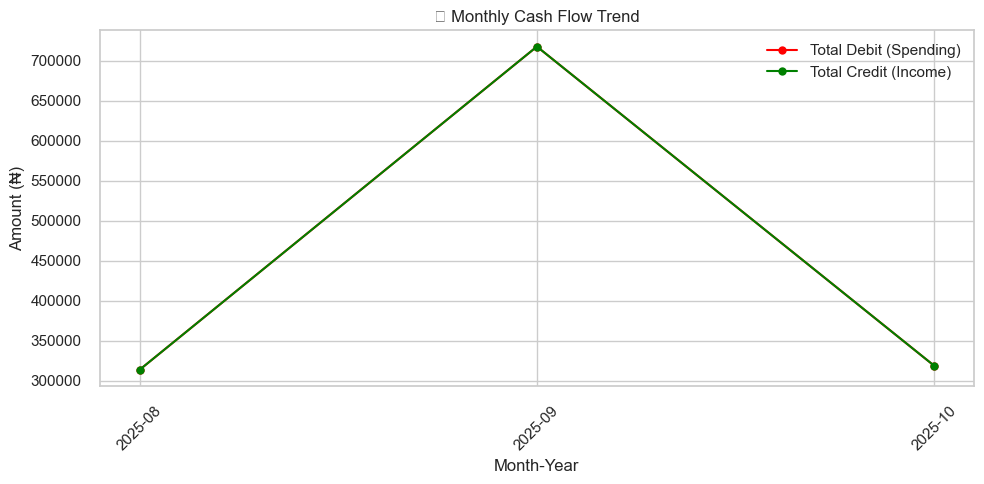

In [31]:
monthly = (
    df.groupby('month_year')
    .agg({'debit': 'sum', 'credit': 'sum'})
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(monthly['month_year'].astype(str), monthly['debit'], label='Total Debit (Spending)', marker='o', color='red')
plt.plot(monthly['month_year'].astype(str), monthly['credit'], label='Total Credit (Income)', marker='o', color='green')
plt.title("📊 Monthly Cash Flow Trend")
plt.xlabel("Month-Year")
plt.ylabel("Amount (₦)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/mp/37ndhfvn70xdgjmd9pxbyzm80000gn/T/ipykernel_4860/4065218877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='debit', y='channel', palette='coolwarm')
/var/folders/mp/37ndhfvn70xdgjmd9pxbyzm80000gn/T/ipykernel_4860/4065218877.py:13: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/mac/Bank Expense Analysis/bank_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


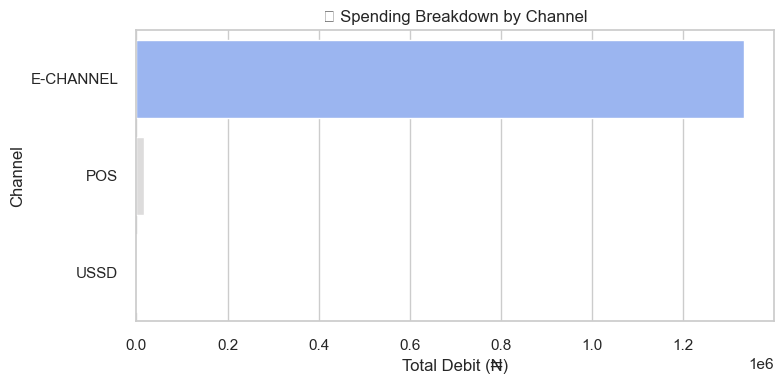

,channel,debit
0,E-CHANNEL,1332241.0
1,POS,16120.0
2,USSD,1520.0


In [33]:
channel_summary = (
    df.groupby('channel')['debit']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8,4))
sns.barplot(data=channel_summary, x='debit', y='channel', palette='coolwarm')
plt.title("🏦 Spending Breakdown by Channel")
plt.xlabel("Total Debit (₦)")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()

channel_summary


In [ ]:
#  Categorize Transactions by Description

def categorize(desc):
    d = str(desc).lower()
    if "airtime" in d or "data" in d:
        return "Airtime & Data"
    if "cold stone" in d or "food" in d or "restaurant" in d or "eat" in d:
        return "Food & Lifestyle"
    if "transfer" in d or "sent to" in d or "beneficiary" in d:
        return "Transfers"
    if "auto-save" in d or "owallet" in d or "piggy" in d or "save" in d:
        return "Savings"
    if "bet" in d or "sporty" in d:
        return "Gaming & Betting"
    if "atm" in d or "pos" in d or "withdrawal" in d:
        return "Cash Withdrawal"
    return "Other"

# Apply the categorization
df["category"] = df["description"].apply(categorize)

# Preview categorized data
df[["trans_date", "description", "category"]].head(10)


,trans_date,description,category
0,2025-08-15,Transfer from benjamin chidubem nwandu,Transfers
1,2025-08-15,Electronic Money Transfer Levy,Transfers
2,2025-08-15,Airtime,Airtime & Data
3,2025-08-15,Transfer from benjamin chidubem nwandu,Transfers
4,2025-08-15,OPay Card Payment,Other
5,2025-08-15,Auto-save to OWealth Balance,Savings
6,2025-08-16,Transfer from benjamin chidubem nwandu,Transfers
7,2025-08-16,Transfer to MICHAEL SAMSON-ODIGIE,Transfers
8,2025-08-19,Transfer to COLD STONE SATELLITE NG,Food & Lifestyle
9,2025-08-19,OWealth Withdrawal(Transaction Payment),Cash Withdrawal


/var/folders/mp/37ndhfvn70xdgjmd9pxbyzm80000gn/T/ipykernel_4860/2834268080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x="debit", y="category", palette="viridis")
/var/folders/mp/37ndhfvn70xdgjmd9pxbyzm80000gn/T/ipykernel_4860/2834268080.py:15: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) Arial.
  plt.tight_layout()
/Users/mac/Bank Expense Analysis/bank_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


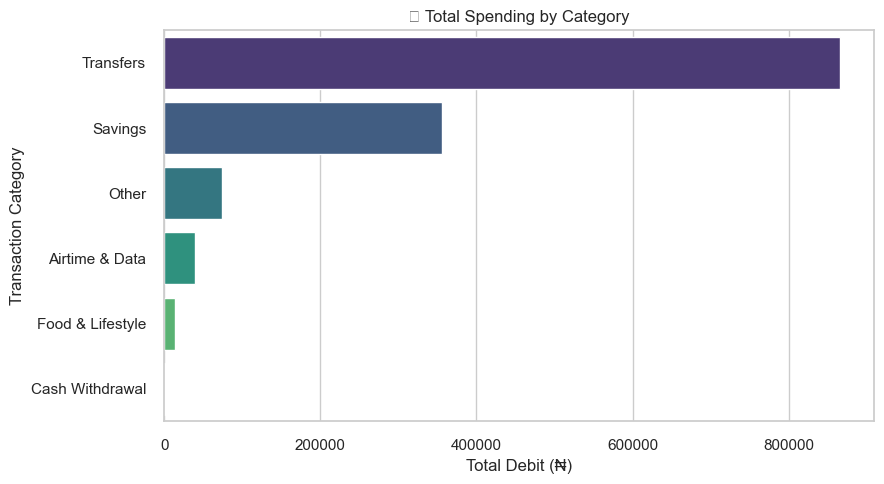

,category,debit
0,Transfers,866060.0
1,Savings,355420.0
2,Other,74601.0
3,Airtime & Data,39600.0
4,Food & Lifestyle,13400.0
5,Cash Withdrawal,800.0


In [ ]:
# Spending by Category

category_summary = (
    df.groupby("category")["debit"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=category_summary, x="debit", y="category", palette="viridis")
plt.title("💳 Total Spending by Category")
plt.xlabel("Total Debit (₦)")
plt.ylabel("Transaction Category")
plt.tight_layout()
plt.show()

category_summary


In [36]:
summary = (
    category_summary.assign(
        percent=lambda x: (x["debit"] / x["debit"].sum()) * 100
    )
    .round(2)
)
print("📊 Category Spending Breakdown:")
summary


📊 Category Spending Breakdown:


,category,debit,percent
0,Transfers,866060.0,64.16
1,Savings,355420.0,26.33
2,Other,74601.0,5.53
3,Airtime & Data,39600.0,2.93
4,Food & Lifestyle,13400.0,0.99
5,Cash Withdrawal,800.0,0.06
